## Let's try to convert the images to the CIEL*a*b* color space

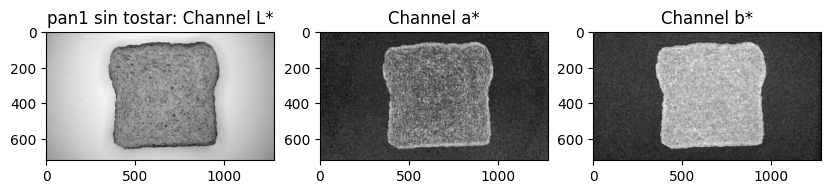

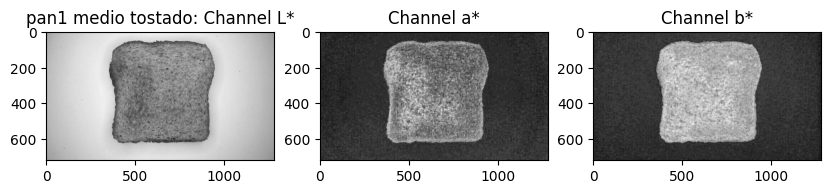

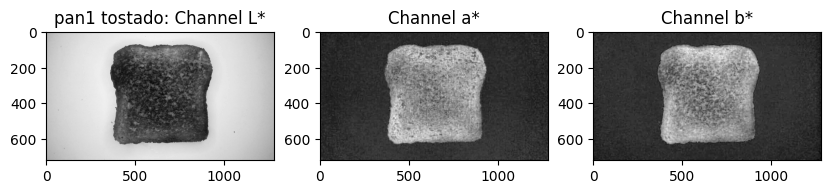

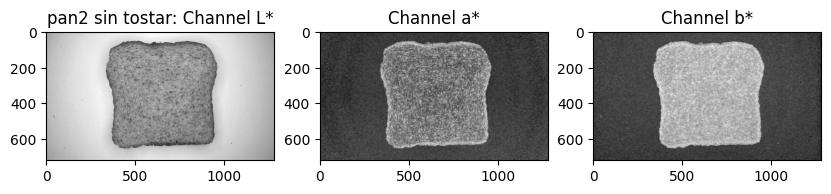

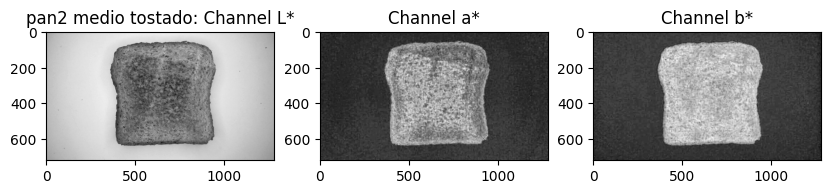

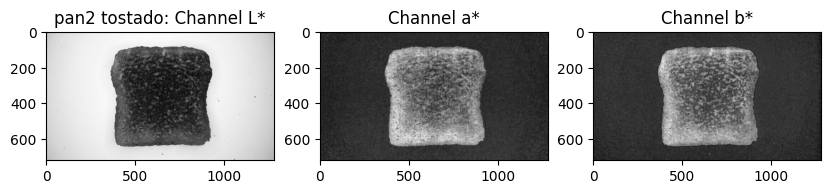

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def l2_distance(pan1, pan2):
    return np.linalg.norm(cv2.absdiff(pan1, pan2))
    
def cielab_from(img_path):
    image = cv2.imread('toasted_bread_dataset/' + img_path)
    img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    l_channel, a_channel, b_channel = cv2.split(img_lab)
    
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 3, 1)
    plt.imshow(l_channel, cmap='gray')
    plt.title(img_path.split('.')[0] + ': Channel L*')
    
    plt.subplot(1, 3, 2)
    plt.imshow(a_channel, cmap='gray')
    plt.title('Channel a*')
    
    plt.subplot(1, 3, 3)
    plt.imshow(b_channel, cmap='gray')
    plt.title('Channel b*')
    
    plt.show()
    
    return img_lab
    
reference_not_toasted_bread = cielab_from('pan1 sin tostar.jpg')
reference_medium_toasted_bread = cielab_from('pan1 medio tostado.jpg')
reference_very_toasted_bread = cielab_from('pan1 tostado.jpg')

not_toasted_bread = cielab_from('pan2 sin tostar.jpg')
medium_toasted_bread = cielab_from('pan2 medio tostado.jpg')
very_toasted_bread = cielab_from('pan2 tostado.jpg')

In [2]:
all_breads = [reference_not_toasted_bread, reference_medium_toasted_bread, reference_very_toasted_bread, not_toasted_bread, medium_toasted_bread, very_toasted_bread]

## Let's calculate the L2 distance between all the breads

In [3]:
n = len(all_breads)
differences_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        diff1 = l2_distance(all_breads[i], all_breads[j])
        diff2 = l2_distance(all_breads[j], all_breads[i])
        differences_matrix[i, j] = diff1
        differences_matrix[j, i] = diff2

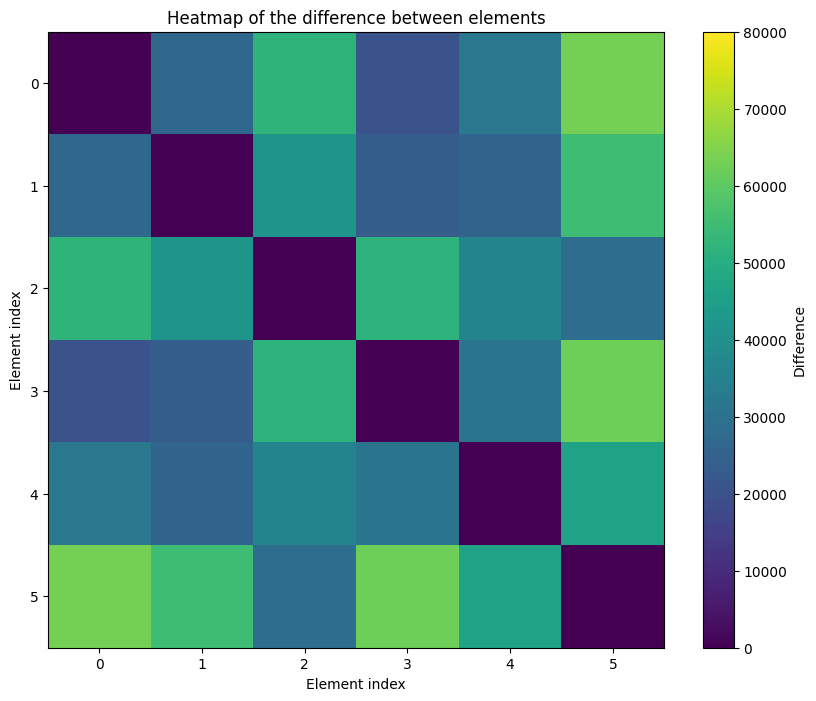

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.imshow(differences_matrix, interpolation='nearest', vmin=0, vmax=80000)

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Difference')

ax.set_title('Heatmap of the difference between elements')
ax.set_xlabel('Element index')
ax.set_ylabel('Element index')

ax.set_xticks(np.arange(len(differences_matrix)))
ax.set_yticks(np.arange(len(differences_matrix)))

plt.show()

In [5]:
all_breads = [reference_not_toasted_bread, reference_medium_toasted_bread, reference_very_toasted_bread, not_toasted_bread, medium_toasted_bread, very_toasted_bread]
images_paths = ["pan_de_referencia_sin_tostar", "pan_de_referencia_medio_tostado", "pan_de_referencia_tostado", "pan2_sin_tostar", "pan2_medio_tostado", "pan2_tostado"]
for i in range(len(differences_matrix)):
    min_value, min_index = min((value, index) for index, value in enumerate(differences_matrix[i]) if value != 0)
    print(min_value, images_paths[i], images_paths[min_index])


20484.741980313054 pan_de_referencia_sin_tostar pan2_sin_tostar
23588.86082455022 pan_de_referencia_medio_tostado pan2_sin_tostar
28901.400277495206 pan_de_referencia_tostado pan2_tostado
20484.741980313054 pan2_sin_tostar pan_de_referencia_sin_tostar
25647.96368135295 pan2_medio_tostado pan_de_referencia_medio_tostado
28901.400277495206 pan2_tostado pan_de_referencia_tostado


## Color histogram

In [6]:
def show_histogram_one_image_all_channels(image_name):
    l_channel, a_channel, b_channel = cv2.split(image_name)

    histSize = [256]
    histRange = [0, 256]
    accumulate = False
    
    l_hist = cv2.calcHist([l_channel], [0], None, histSize, histRange, accumulate=accumulate)
    a_hist = cv2.calcHist([a_channel], [0], None, histSize, histRange, accumulate=accumulate)
    b_hist = cv2.calcHist([b_channel], [0], None, histSize, histRange, accumulate=accumulate)
    
    plt.figure()
    plt.title("Color Histograms in CIEL*a*b* Space")
    plt.xlabel("Bin")
    plt.ylabel("# of Pixels")
    plt.plot(l_hist, color='black', label='L* Channel')
    plt.plot(a_hist, color='green', label='a* Channel')
    plt.plot(b_hist, color='blue', label='b* Channel')
    plt.legend()

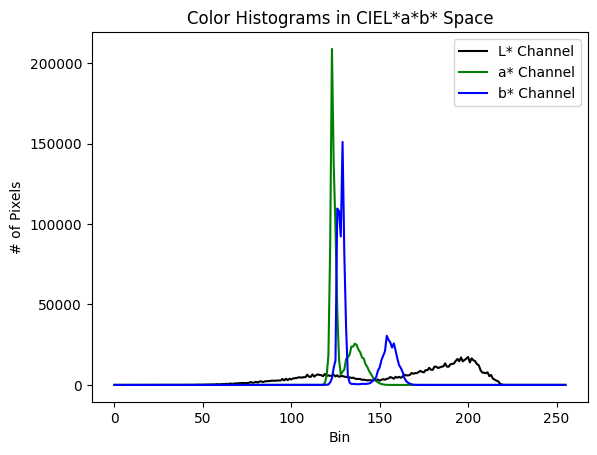

In [7]:
show_histogram_one_image_all_channels(reference_medium_toasted_bread)

In [8]:
def show_histogram_all_images_one_channel(image_paths, channel_index):
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']
    plt.figure()
    plt.title("Histograms for Multiple Images for channel " + str(channel_index))
    plt.xlabel("Bin")
    plt.ylabel("# of Pixels")
    
    for idx, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)
        channel = cv2.split(image)[channel_index]
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
        histogram = histogram / np.max(histogram)
        plt.plot(histogram, color=colors[idx % len(colors)], label=image_path.split('/')[-1])
    
    plt.legend()
    plt.xlim([0, 256])
    plt.show()

In [9]:
import os
root_images_dir = 'toasted_bread_dataset/'
dataset_paths = [root_images_dir + image_path for image_path in os.listdir(root_images_dir)]
dataset_paths

['toasted_bread_dataset/pan1 sin tostar.jpg',
 'toasted_bread_dataset/pan2 tostado bis.jpg',
 'toasted_bread_dataset/pan2 sin tostar.jpg',
 'toasted_bread_dataset/pan1 tostado bis.jpg',
 'toasted_bread_dataset/pan2 tostado.jpg',
 'toasted_bread_dataset/pan2 medio tostado.jpg',
 'toasted_bread_dataset/pan1 tostado.jpg',
 'toasted_bread_dataset/pan1 medio tostado.jpg']

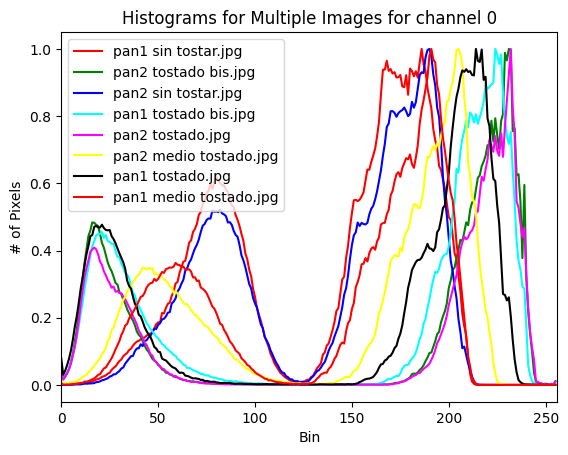

In [10]:
show_histogram_all_images_one_channel(dataset_paths, 0)

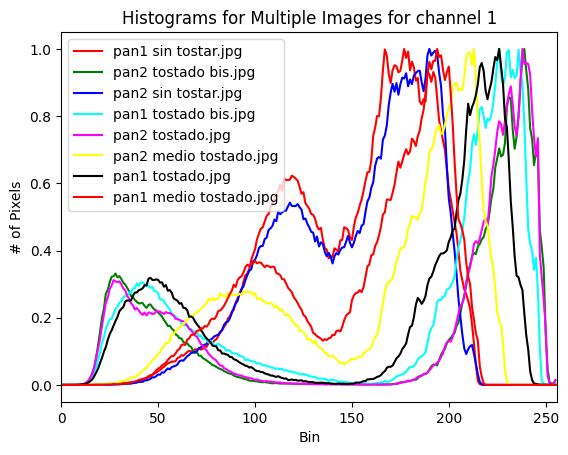

In [11]:
show_histogram_all_images_one_channel(dataset_paths, 1)

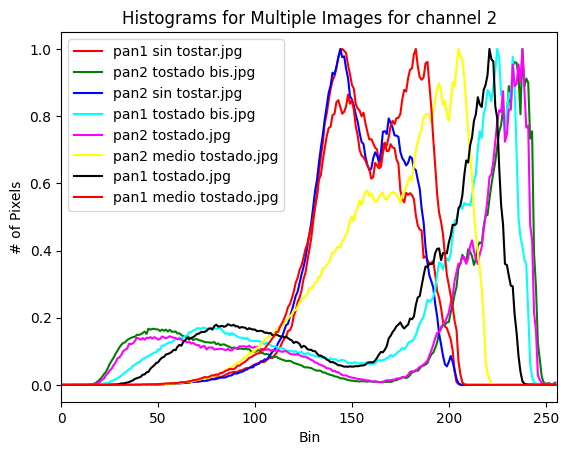

In [12]:
show_histogram_all_images_one_channel(dataset_paths, 2)

So now we see that in the histogram the background color is also present. So we'll try to remove it. The plan is to detect the edge of the bread, remove the background and then take the color histogram.

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def masked_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 30, 40)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=3)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return masked_image

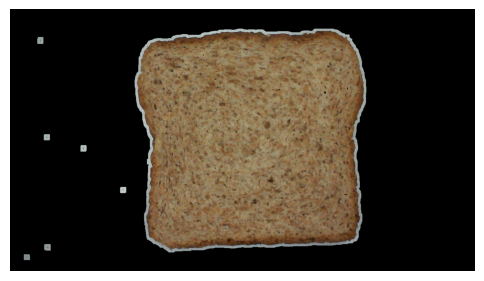

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
masked_image(dataset_paths[0])